In [643]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_curve,accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
%matplotlib inline

In [644]:
pwd

'/Users/shardulsathe/Desktop/AIML/Month5/Project'

In [645]:
ls

Qualitative Bankruptcy - Problem_Description.pdf
R5_Bankruptcy_PCA_Project.ipynb
drive-download-20191118T133407Z-001 (1)/
drive-download-20191118T133407Z-001 (1).zip


In [646]:
ls 'drive-download-20191118T133407Z-001 (1)/'

Qualitative_Bankruptcy.data.txt  Qualitative_Bankruptcy.info.txt


Attribute Information: (P=Positive,A-Average,N-negative,B-Bankruptcy,NB-Non-Bankruptcy)
 
     1. Industrial Risk: {P,A,N}
     2. Management Risk: {P,A,N}
     3. Financial Flexibility: {P,A,N}
     4. Credibility: {P,A,N}
     5. Competitiveness: {P,A,N}
     6. Operating Risk: {P,A,N}
     7. Class: {B,NB}

In [647]:
columns = ['IR','MR','FF','CR','CO','OP','Class']
bank_df = pd.read_csv('drive-download-20191118T133407Z-001 (1)/Qualitative_Bankruptcy.data.txt',names=columns)
bank_df.head()

,IR,MR,FF,CR,CO,OP,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [648]:
bank_df.shape

(250, 7)

In [649]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
IR       250 non-null object
MR       250 non-null object
FF       250 non-null object
CR       250 non-null object
CO       250 non-null object
OP       250 non-null object
Class    250 non-null object
dtypes: object(7)
memory usage: 13.8+ KB


In [650]:
bank_encoded_df = bank_df.copy()

In [651]:
#Apply encoding
for col in columns:
    bank_encoded_df[col] = bank_encoded_df[col].astype('category')
    bank_encoded_df[col] = bank_encoded_df[col].cat.codes


In [652]:
bank_encoded_df.head()

,IR,MR,FF,CR,CO,OP,Class
0,2,2,0,0,0,2,1
1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,1
3,2,2,2,2,2,2,1
4,1,1,2,2,2,1,1


In [653]:
bank_df.head()

,IR,MR,FF,CR,CO,OP,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB


In [654]:
bank_encoded_df.tail()

,IR,MR,FF,CR,CO,OP,Class
245,1,1,0,1,1,1,0
246,2,1,1,1,1,1,0
247,0,1,1,1,1,1,0
248,1,1,1,1,1,1,0
249,2,1,1,1,0,0,0


In [655]:
bank_df.tail()

,IR,MR,FF,CR,CO,OP,Class
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B
249,P,N,N,N,A,A,B


By comparing the original and encoded dataframes, we can observe the following mapping:

P -> 2, 
A -> 0, 
N -> 1, 
NB -> 1, 
B -> 0

In [656]:
bank_encoded_df.describe()

,IR,MR,FF,CR,CO,OP,Class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.996000,0.972000,0.932000,1.008000,1.140000,1.088000,0.572000
std,0.804096,0.724788,0.722123,0.791481,0.755435,0.733764,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [657]:
bank_encoded_df['Class'].value_counts()

1    143
0    107
Name: Class, dtype: int64

/Users/shardulsathe/Anaconda3/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/shardulsathe/Anaconda3/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


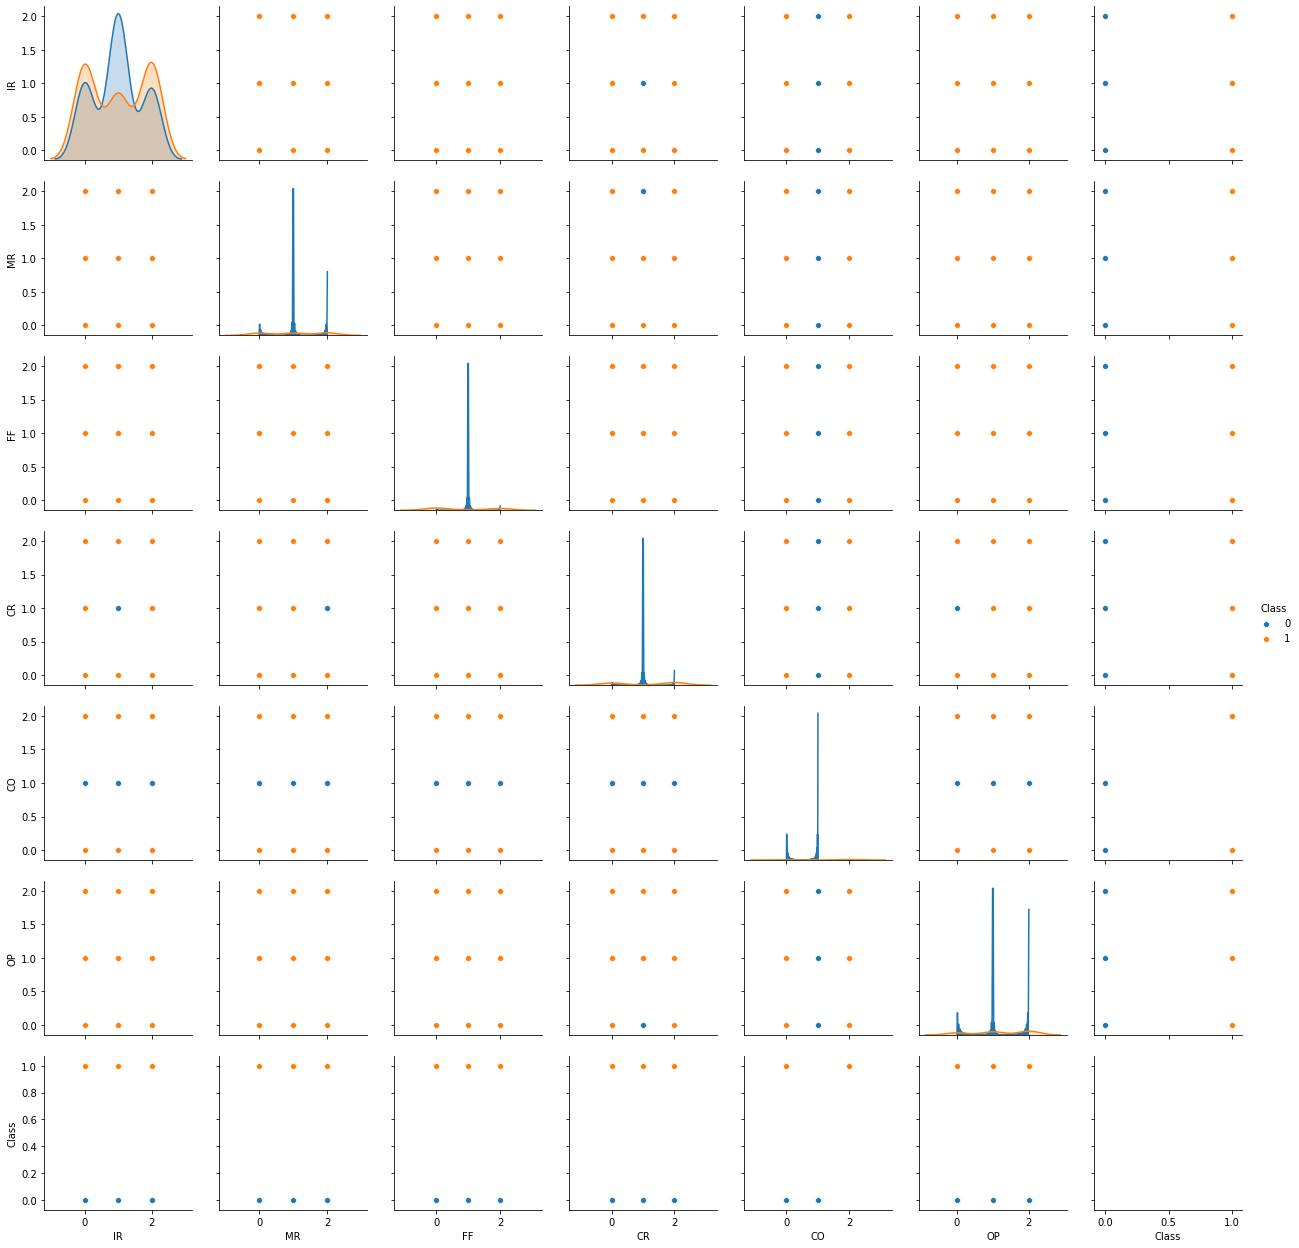

In [658]:
sns.pairplot(bank_encoded_df,hue='Class',diag_kind = 'kde')

# Build model without unsupervised learning

In [659]:
target = bank_encoded_df["Class"]
features = bank_encoded_df.drop(["Class"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 10)

In [660]:
# Building a Support Vector Machine on train data
def svc_model(X_train, X_test,c=1.0,kernel='linear'):
    print('C: ',c,' Kernel: ',kernel)
    svc_model = SVC(C= c, kernel=kernel, gamma= 1)
    svc_model.fit(X_train, y_train)
    prediction = svc_model.predict(X_test)
    print('Training Score: ',svc_model.score(X_train, y_train))
    print('Testing Score: ',svc_model.score(X_test, y_test))
    print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))

In [661]:
svc_model(X_train, X_test)

C:  1.0  Kernel:  linear
Training Score:  0.6
Testing Score:  0.56
Confusion Matrix:
 [[ 9 10]
 [12 19]]


In [662]:
for i in range(1,1000,100):
    svc_model(X_train, X_test,c=i)

C:  1  Kernel:  linear
Training Score:  0.6
Testing Score:  0.56
Confusion Matrix:
 [[ 9 10]
 [12 19]]
C:  101  Kernel:  linear
Training Score:  0.605
Testing Score:  0.6
Confusion Matrix:
 [[11 10]
 [10 19]]
C:  201  Kernel:  linear
Training Score:  0.59
Testing Score:  0.56
Confusion Matrix:
 [[ 9 10]
 [12 19]]
C:  301  Kernel:  linear
Training Score:  0.605
Testing Score:  0.6
Confusion Matrix:
 [[11 10]
 [10 19]]
C:  401  Kernel:  linear
Training Score:  0.59
Testing Score:  0.56
Confusion Matrix:
 [[ 9 10]
 [12 19]]
C:  501  Kernel:  linear
Training Score:  0.605
Testing Score:  0.6
Confusion Matrix:
 [[11 10]
 [10 19]]
C:  601  Kernel:  linear
Training Score:  0.605
Testing Score:  0.6
Confusion Matrix:
 [[11 10]
 [10 19]]
C:  701  Kernel:  linear
Training Score:  0.605
Testing Score:  0.6
Confusion Matrix:
 [[11 10]
 [10 19]]
C:  801  Kernel:  linear
Training Score:  0.59
Testing Score:  0.56
Confusion Matrix:
 [[ 9 10]
 [12 19]]
C:  901  Kernel:  linear
Training Score:  0.58
Te

In [663]:
kernels = ['linear','poly','sigmoid','rbf']
for kernel in kernels:
    svc_model(X_train, X_test,kernel=kernel)

C:  1.0  Kernel:  linear
Training Score:  0.6
Testing Score:  0.56
Confusion Matrix:
 [[ 9 10]
 [12 19]]
C:  1.0  Kernel:  poly
Training Score:  0.99
Testing Score:  1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
C:  1.0  Kernel:  sigmoid
Training Score:  0.29
Testing Score:  0.28
Confusion Matrix:
 [[ 1 16]
 [20 13]]
C:  1.0  Kernel:  rbf
Training Score:  1.0
Testing Score:  1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]


accuracy with Poly & RBF kernels is 100% whereas Linear kernel has ~60% accuracy & sigmoid is around 28%

## Apply PCA 

In [664]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
X_test_std =  sc.fit_transform(X_test)          
cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00502513  0.13205251  0.06170118 -0.04822914  0.09115576  0.17498673]
 [ 0.13205251  1.00502513 -0.079827   -0.02832691 -0.08383196  0.21647803]
 [ 0.06170118 -0.079827    1.00502513 -0.02901812  0.18421571 -0.10709123]
 [-0.04822914 -0.02832691 -0.02901812  1.00502513  0.09024038  0.00423651]
 [ 0.09115576 -0.08383196  0.18421571  0.09024038  1.00502513 -0.02672819]
 [ 0.17498673  0.21647803 -0.10709123  0.00423651 -0.02672819  1.00502513]]


In [665]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 0.35475436  0.55497043 -0.13408799  0.35117193  0.62583357 -0.18217625]
 [ 0.57678889  0.07633084  0.01197159 -0.68490297 -0.12968343 -0.41884961]
 [-0.33798815  0.52443242 -0.28919732 -0.54052953  0.10558439  0.47305319]
 [-0.1151587   0.05209866  0.89874412 -0.20282309  0.35415133  0.09860447]
 [-0.26601625  0.61320916  0.23609711  0.18940908 -0.56046654 -0.38401757]
 [ 0.58583424  0.1800342   0.18643811  0.19596178 -0.37526068  0.64062873]]

 Eigen Values 
%s [1.39721329 1.23445401 1.04576545 0.8271748  0.77421912 0.75132408]


In [666]:
#Sort Eigenvalues and Eigenvectors
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1.3972132876473813, array([ 0.35475436,  0.57678889, -0.33798815, -0.1151587 , -0.26601625,
        0.58583424])), (1.2344540081131459, array([0.55497043, 0.07633084, 0.52443242, 0.05209866, 0.61320916,
       0.1800342 ])), (1.0457654549946966, array([-0.13408799,  0.01197159, -0.28919732,  0.89874412,  0.23609711,
        0.18643811])), (0.8271747974959088, array([ 0.35117193, -0.68490297, -0.54052953, -0.20282309,  0.18940908,
        0.19596178])), (0.7742191219295204, array([ 0.62583357, -0.12968343,  0.10558439,  0.35415133, -0.56046654,
       -0.37526068])), (0.7513240835881869, array([-0.18217625, -0.41884961,  0.47305319,  0.09860447, -0.38401757,
        0.64062873]))]
Eigenvalues in descending order: 
[1.3972132876473813, 1.2344540081131459, 1.0457654549946966, 0.8271747974959088, 0.7742191219295204, 0.7513240835881869]


In [667]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. 

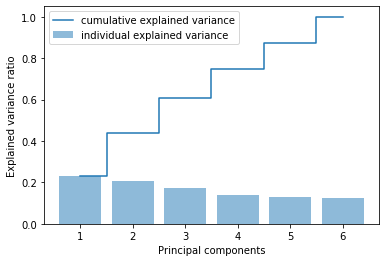

In [668]:
plt.bar(range(1,eigenvalues.shape[0]+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,eigenvalues.shape[0]+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [669]:
cum_var_exp

array([0.23170454, 0.43641816, 0.60984093, 0.74701409, 0.87540542,
       1.        ])

Based on the problem statement: Display elbow plot to find out reduced number of dimensions (which covers more than 95% of the variance)..

We need to pick all principal components to get at least 95% variance

In [670]:
#Centering the data
X_train_centered_std = X_train_std - X_train_std.mean(axis=0)
X_test_centered_std = X_test_std - X_test_std.mean(axis=0)
pca = PCA(n_components=6)
pca.fit(X_train_centered_std)

#get new dimensions
X_train_pca = pca.transform(X_train_centered_std)
X_test_pca = pca.transform(X_test_centered_std)

In [671]:
X_train_pca.shape,X_test_pca.shape

((200, 6), (50, 6))

In [672]:
pca.explained_variance_ratio_

array([0.23170454, 0.20471362, 0.17342277, 0.13717315, 0.12839134,
       0.12459458])

## Kmeans

### 1. The Elbow Method


In [673]:
# Let us check optimal number of clusters-
min_clusters = 1
max_clusters = 6
cluster_range = range( min_clusters, max_clusters+1)
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 100,init='k-means++',random_state=0)
    cluster_labels = clusters.fit(X_train_pca)
    labels = cluster_labels.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append( cluster_labels.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:max_clusters]



,num_clusters,cluster_errors
0,1,1200.000000
1,2,1021.346480
2,3,898.265941
3,4,812.558883
4,5,749.711823
5,6,690.047488


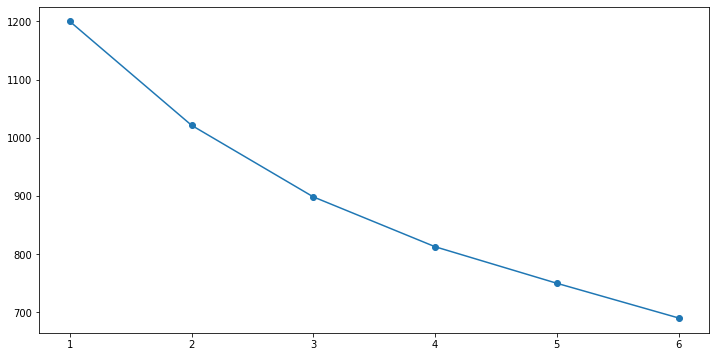

In [674]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )    

In [675]:
for i in range(8):
    print(errors[i+1]-errors[i], errors[i]/errors[i+1])

-178.6535196556913 1.17491960181374
-123.08053963824227 1.1370201563486833
-85.70705792853119 1.105477965652855
-62.84706009140234 1.083828290003789
-59.664334317696785 1.086464098954651
-47.73212673510977 1.0743126034129606
-43.202261278424885 1.0721103598850248
-38.35351673599325 1.0683956509284704


The elbow plot isn't helpful but based on the difference in the error (absolute value as well as %), we can form either 4 or 5 clusters

In [676]:
def run_kmeans(n_clusters,X_train_pca):
    kmeans = KMeans(n_clusters=n_clusters,n_init = 100,init='k-means++',random_state=0)
    # Fitting the input data
    kmeans = kmeans.fit(X_train_pca)
    # Centroid values
    centroids = kmeans.cluster_centers_
    #print("Centroid values")
    #print(centroids) # From sci-kit learn
    
    colnames = ["pc1","pc2","pc3","pc4","pc5","pc6"]
    train_prediction= kmeans.predict(X_train_pca)
    X_train_pca_clustered_df = pd.DataFrame(X_train_pca, columns= colnames)
    X_train_pca_clustered_df["cluster"] = train_prediction

    test_prediction= kmeans.predict(X_test_pca)
    X_test_pca_clustered_df = pd.DataFrame(X_test_pca, columns= colnames)
    X_test_pca_clustered_df["cluster"] = test_prediction
    return(X_train_pca_clustered_df, X_test_pca_clustered_df)

In [677]:
for n_clusters in range(2,7):
    X_train_pca_clustered_df, X_test_pca_clustered_df = run_kmeans(n_clusters,X_train_pca)
   # print(X_train_pca_clustered_df.shape,X_test_pca_clustered_df.shape)
    print('n_clusters = ',n_clusters)
    for kernel in kernels:
        svc_model(X_train_pca_clustered_df, X_test_pca_clustered_df,kernel=kernel)

n_clusters =  2
C:  1.0  Kernel:  linear
Training Score:  0.615
Testing Score:  0.7
Confusion Matrix:
 [[12  6]
 [ 9 23]]
C:  1.0  Kernel:  poly
Training Score:  1.0
Testing Score:  1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
C:  1.0  Kernel:  sigmoid
Training Score:  0.37
Testing Score:  0.54
Confusion Matrix:
 [[ 8 10]
 [13 19]]
C:  1.0  Kernel:  rbf
Training Score:  1.0
Testing Score:  1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
n_clusters =  3
C:  1.0  Kernel:  linear
Training Score:  0.71
Testing Score:  0.82
Confusion Matrix:
 [[17  5]
 [ 4 24]]
C:  1.0  Kernel:  poly
Training Score:  1.0
Testing Score:  0.98
Confusion Matrix:
 [[21  1]
 [ 0 28]]
C:  1.0  Kernel:  sigmoid
Training Score:  0.32
Testing Score:  0.42
Confusion Matrix:
 [[11 19]
 [10 10]]
C:  1.0  Kernel:  rbf
Training Score:  1.0
Testing Score:  1.0
Confusion Matrix:
 [[21  0]
 [ 0 29]]
n_clusters =  4
C:  1.0  Kernel:  linear
Training Score:  0.725
Testing Score:  0.76
Confusion Matrix:
 [[19 10]
 [ 2 19]]
C:  1.0  Ker

As we can see, with 3 clusters, The accuracy of the model with linear kernel has increased to 82% from 56% (without PCA) whereas the accuracy of the model with sigmoid kernel has increased to 42% from 28% (without PCA)

Based on this calculation, we think 3 clusters might be better than 4 or 5 clusters (based on elbow plot). Let's see if we get more insights using silhouette plots

# 2. Silhouette Analysis

In [678]:
def plot_silhouette(df):
    
    
    print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

#X, y = make_blobs(n_samples=500,
#                      n_features=2,
#                      centers=4,
#                      cluster_std=1,
#                      center_box=(-10.0, 10.0),
##                      shuffle=True,
#                      random_state=1)  # For reproducibility

    X = df
    range_n_clusters = [2, 3, 4, 5, 6]
    
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", round(silhouette_avg,3))

    # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.144
For n_clusters = 3 The average silhouette_score is : 0.159
For n_clusters = 4 The average silhouette_score is : 0.167
For n_clusters = 5 The average silhouette_score is : 0.169
For n_clusters = 6 The average silhouette_score is : 0.185


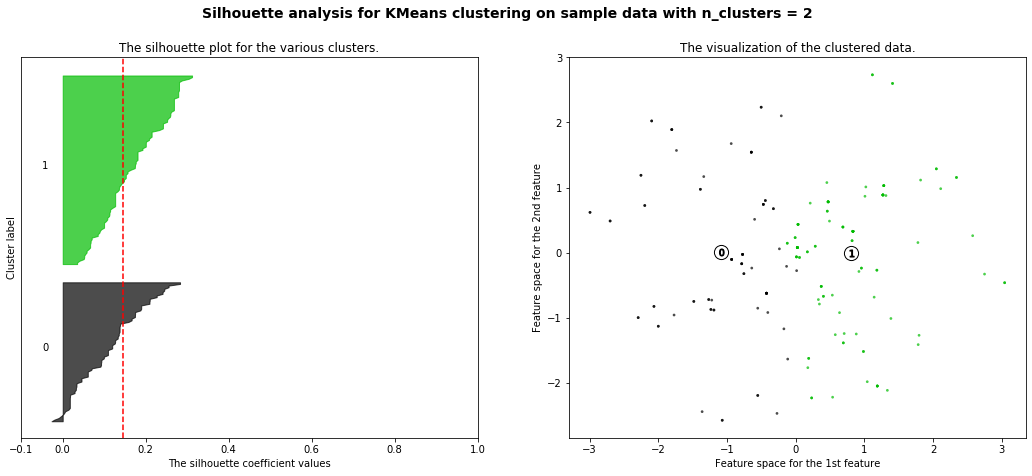

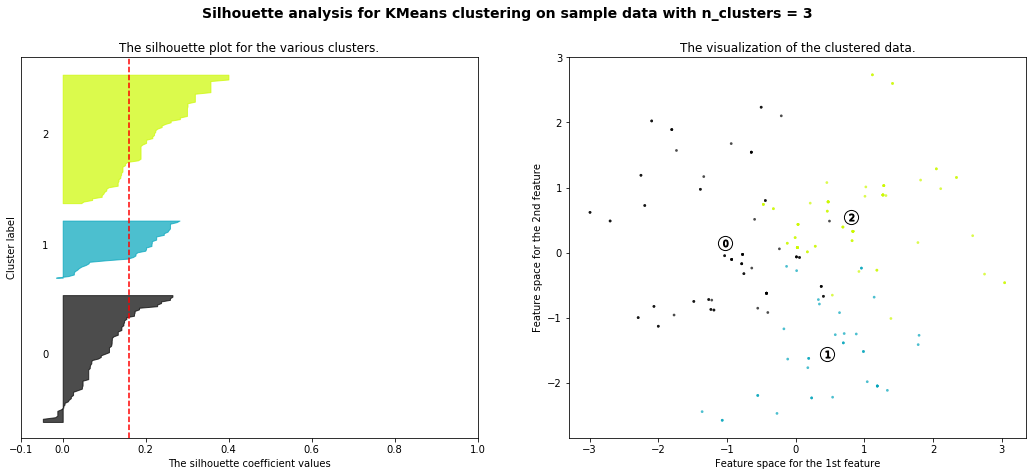

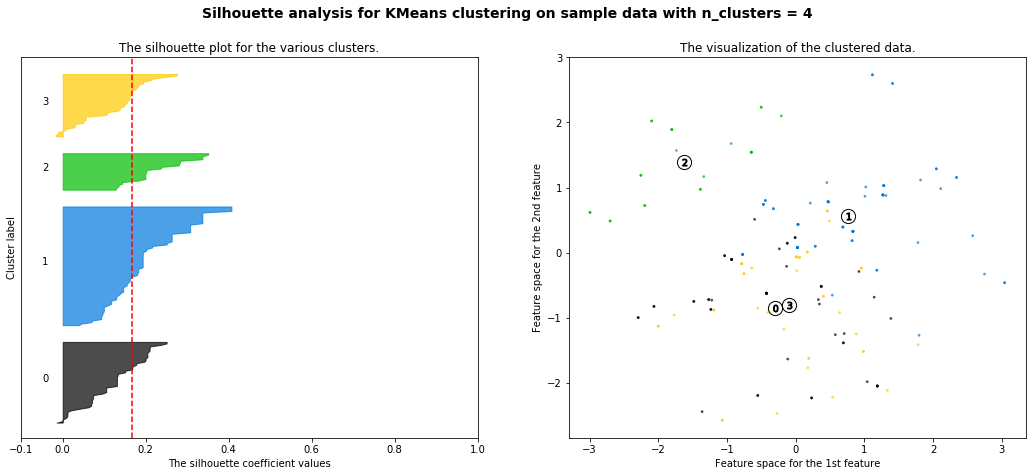

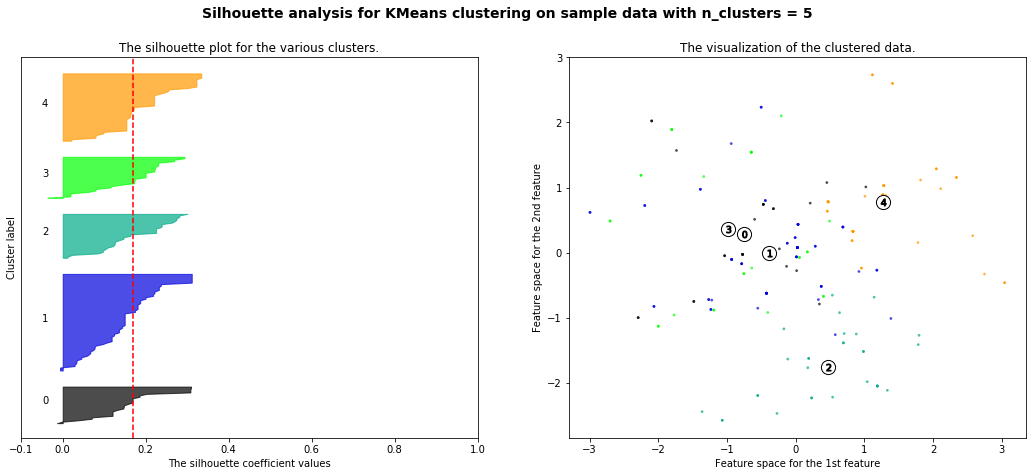

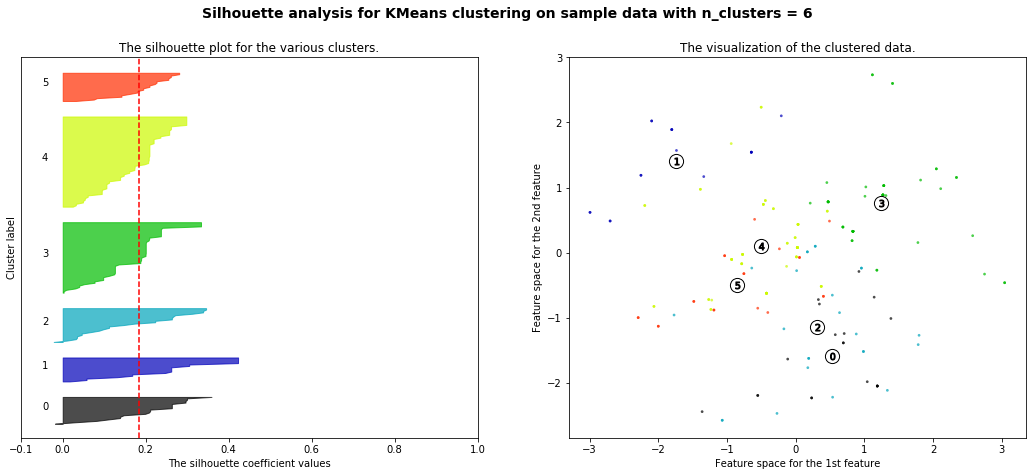

In [679]:
# Let us check optimal number of clusters using Silhouette analysis-

plot_silhouette(X_train_pca)



The silhouette scores range between [-1,1] where higher the score the better. The silhouette scores computed above aren't large enough. 

with n_clusters = 4 and beyond, the scatter plots don't make sense since the centroids are too close. Although the scatter plot with 2 clusters looks better than 3 clusters, considering the results of elbow plot, we should pick 3 clusters

# Questions for the instrcutor/ examiner:
1. Why use PCA or Kmeans at all if the prediction accuracy was 100%? (Although PCA has helped improve the accuracy of linear & sigmoid kernel)

2. After creating clusters, is it a good idea to divide the dataset based on clusters and create separate models?
